In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

Topic: How does people's preference for car's charateristics change over time?

- time defined as registration date year
- preference increase if there are more this type of cars in the data


In [ ]:
temp_path = "/train.csv"
data = pd.read_csv(temp_path, index_col="listing_id")

In [ ]:
# DIR = "drive/MyDrive/data/"
# FILE = DIR + "train.csv"

# data = pd.read_csv(FILE, index_col="listing_id")
data.reg_date = pd.to_datetime(data.reg_date)
data.original_reg_date = pd.to_datetime(data.original_reg_date)

# Filtering columns
data_filtered = data.drop(data.columns[[17, 22, 23, 24, 27]], 1)

In [ ]:
# Removing duplicate rows (keep first)
idx_duplicated = data_filtered.index.duplicated(keep="first")
data1 = data_filtered[~idx_duplicated]

In [ ]:
# Impute missing reg_date
idx_missing = data1.reg_date.isna()
data1.loc[idx_missing, "reg_date"] = data1.loc[idx_missing, "original_reg_date"]

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


The various plots we did includes:
- lineplots, stacked bars and distribution barplot (type_of_vehicle) v.s. year
- lineplots, stacked bars and distribution barplot (make) v.s. year
- lineplots, stacked bars and distribution barplot (fuel_type) v.s. year

In [ ]:
# based on the count plot, filter data to be > 2005
data1['reg_date_year'] = data1.reg_date.dt.year
data1 = data1[~(data1.reg_date.dt.year > 2021)]
data1 = data1[data1.reg_date.dt.year > 2005]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
data1.isna().sum()

title                    0
complete_make            0
make                  2137
model                    0
description            337
manufactured           190
original_reg_date    16169
reg_date                 0
type_of_vehicle          0
category                 0
transmission             0
curb_weight            378
power                 2103
fuel_type                0
engine_cap              53
no_of_owners           172
depreciation           424
coe                    869
dereg_value           1158
mileage               3573
omv                      4
arf                    244
features               386
accessories           2739
price                    0
reg_date_year            0
complete                 0
dtype: int64

In [ ]:
# set plot style
sns.set(style="darkgrid")
sns.set_palette("tab10")

## type_of_vehicle analysis

In [ ]:
data1.type_of_vehicle.unique()

array(['luxury sedan', 'van', 'mid-sized sedan', 'sports car',
       'hatchback', 'truck', 'mpv', 'stationwagon', 'suv', 'bus/mini bus',
       'others'], dtype=object)

In [ ]:
data1['reg_date_year'] = data1.reg_date.dt.year
data1 = data1[~(data1.reg_date.dt.year > 2021)]
group_tb = data1.groupby(['reg_date_year', 'type_of_vehicle']).agg({'title': 'count'})
group_tb_pct = group_tb.groupby(level=0).apply(lambda x:  x / float(x.sum()))
group_tb_pct.reset_index(inplace=True)
group_tb_pct.rename({'title': '% of the year'}, inplace=True, axis=1)

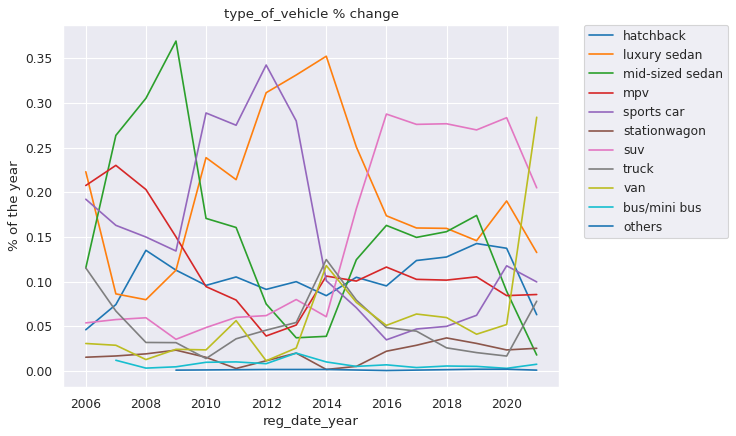

In [ ]:
# lineplots for type of vehicles
figure(figsize=(8, 6), dpi=80)
sns.lineplot(data=group_tb_pct, x="reg_date_year", y="% of the year", hue="type_of_vehicle", palette=sns.color_palette("tab10", n_colors=len(data1['type_of_vehicle'].unique())))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("type_of_vehicle % change")
plt.show()

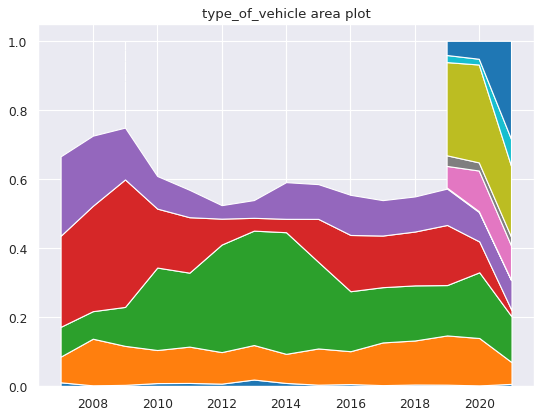

In [ ]:
# stacked bar for type of vehicle
figure(figsize=(8, 6), dpi=80)
type_pivot = pd.pivot_table(group_tb_pct, values='% of the year', index=['reg_date_year'],
                    columns=['type_of_vehicle'], aggfunc=np.sum)
plt.stackplot(type_pivot.index, np.transpose(type_pivot))
plt.title('type_of_vehicle area plot')
plt.show()

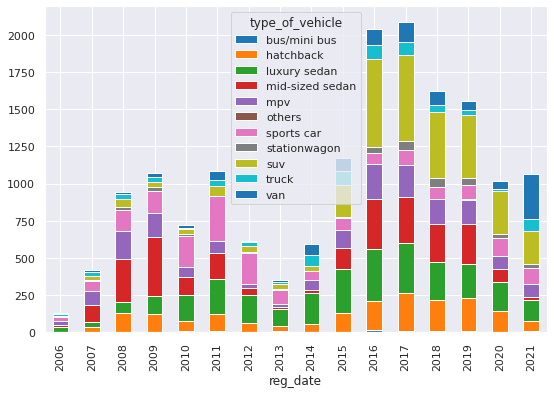

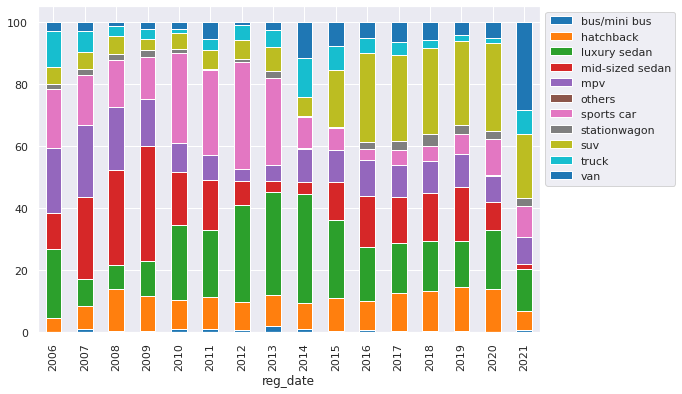

In [ ]:
# distribution plots for vehicle type
# data1 = data1[~(data1.reg_date.dt.year > 2021)]
grouped_data1 = data1.groupby([data1.reg_date.dt.year, "type_of_vehicle"]).size()

# Plot absolute numbers of vehicle type
ax_type1 = grouped_data1.unstack().plot(
    kind="bar", stacked=True, figsize=(9,6)
).legend(bbox_to_anchor=(1, 1))

# Plot percentage of vehicle type
ax_type2 = grouped_data1.groupby(level=0).apply(
    lambda x: 100 * x / x.sum()
).unstack().plot(
    kind='bar', stacked=True, figsize=(9,6)
).legend(bbox_to_anchor=(1, 1))

# ax_type1.figure.savefig(DIR + "type-count.png")
# ax_type2.figure.savefig(DIR + "type-pct.png")

## fuel_type analysis

In [ ]:
# def add_make_model(df: pd.DataFrame) -> pd.DataFrame:
#   df['make_fill'] = df.apply(lambda x: x["make"] if not pd.isnull(x["make"]) else x["title"].lower().split()[0], axis = 1)
#   df['make_fill'][df['make_fill'] == "mercedes"] = "mercedes-benz"
#   df["make_model"] = df["make_fill"] + " " + df["model"]
#   return df

# def backfill_fuel_type(df, df_train):
#   df_train = add_make_model(df_train)
#   df_non_missing = df_train[~(df_train['fuel_type'].isna())][['make_model', 'fuel_type']]
#   grouped_series = df_non_missing.groupby(['make_model', 'fuel_type']).fuel_type.count()
#   grouped_top = pd.DataFrame(grouped_series.groupby(level='make_model').nlargest(1).reset_index(level=0, drop=True))
#   grouped_top.rename({"fuel_type": "count"}, axis=1, inplace=True)
#   grouped_top.reset_index(inplace=True)
#   grouped_top.rename({"fuel_type": "fuel_type_fill"}, axis=1, inplace=True)

#   df = df.merge(grouped_top, on='make_model', how ='left')
#   df["fuel_type"] = np.where(df['fuel_type'].isnull(), df['fuel_type_fill'], df['fuel_type'])

#   return df

# data1 = backfill_fuel_type(data1, data1)

In [ ]:
data1.fuel_type[data1.fuel_type.isna()] = "missing"
group_tb2 = data1.groupby(['reg_date_year', 'fuel_type']).agg({'title': 'count'})
group_tb2_pct = group_tb2.groupby(level=0).apply(lambda x:   x / float(x.sum()))
group_tb2_pct.reset_index(inplace=True)
group_tb2_pct.rename({'title': '% of the year'}, inplace=True, axis=1)

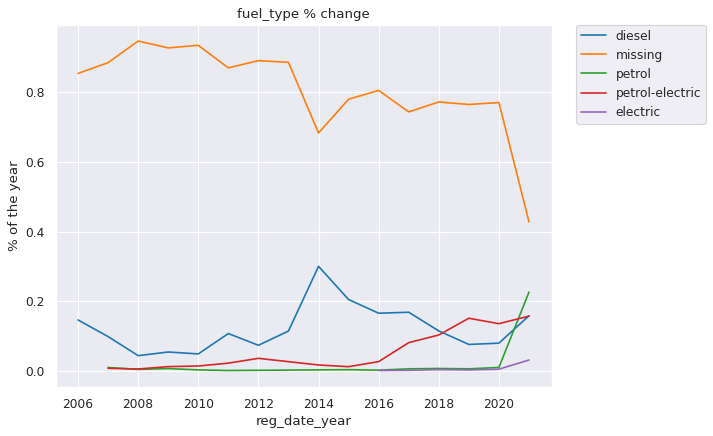

In [ ]:
# lineplot for fuel_type change
figure(figsize=(8, 6), dpi=80)
sns.lineplot(data=group_tb2_pct, x="reg_date_year", y="% of the year", hue="fuel_type", palette=sns.color_palette("tab10", n_colors=len(group_tb2_pct["fuel_type"].unique())))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("fuel_type % change")
plt.show()

In [ ]:
data1[(data1['reg_date_year'] == 2006) & (data1['fuel_type'] == 'petrol-electric')]

,title,make,model,description,manufactured,original_reg_date,reg_date,type_of_vehicle,category,transmission,curb_weight,power,fuel_type,engine_cap,no_of_owners,depreciation,coe,dereg_value,mileage,omv,arf,features,accessories,price,reg_date_year,make_fill,make_model,fuel_type_fill,count
29,Honda Civic 1.8A VTi-S (COE till 05/2026),NaN,civic,"popular model in tip-top condition!, powerful ...",2006.0,NaT,2006-05-03,mid-sized sedan,"coe car, consignment car",auto,1219.0,103.0,petrol-electric,1799.0,5.0,8300.0,46048.0,21586.0,NaN,21276.0,23404.0,"1.8l i-vtec engine, 5 speed auto transmission ...","16"" rims, leather seats, reverse sensors/camer...",42800.0,2006,honda,honda civic,petrol-electric,9.0
130,Lexus IS250 (COE till 05/2026),lexus,is,full loan available! lowest interest rates! ve...,2006.0,NaT,2006-07-13,luxury sedan,"coe car, premium ad car",auto,1625.0,153.0,petrol-electric,2500.0,3.0,8370.0,46048.0,21952.0,NaN,36638.0,40302.0,"2.5l v6 dual vvt-i engine, 205bhp, 8.4s , 6 sp...","sport rims, leather seats, multi function stee...",43900.0,2006,lexus,lexus is,petrol-electric,3.0
705,Lexus GS300 (COE till 05/2026),lexus,gs,"look no further, beautiful new paintwork, new ...",2006.0,NaT,2006-05-18,luxury sedan,coe car,auto,1660.0,170.0,petrol-electric,2994.0,1.0,9050.0,46048.0,21775.0,180000.0,53569.0,58926.0,"3.0l v6 engine, 6 speed auto with shift tronic...","dual memory leather seats, 18' sports rims, fa...",47100.0,2006,lexus,lexus gs,petrol-electric,6.0
1687,Toyota Harrier 2.4A GL (COE till 03/2026),NaN,harrier,low depreciation. good for short term usage. e...,2006.0,NaT,2006-03-20,suv,coe car,auto,1600.0,118.0,petrol-electric,2362.0,4.0,9370.0,50932.0,23261.0,195000.0,35342.0,38877.0,powerful 2.4l dohc vvti engine producing 158bh...,"driver electric seat, sports rims, multi-funct...",47100.0,2006,toyota,toyota harrier,petrol-electric,4.0
2147,Toyota Estima 2.4A Moonroof (COE till 06/2026),NaN,estima,NaN,2006.0,NaT,2006-07-13,mpv,"coe car, direct owner sale",auto,1730.0,125.0,petrol-electric,2362.0,4.0,8250.0,48479.0,23509.0,NaN,32031.0,35235.0,view specs of the toyota estima,car android player.,44000.0,2006,toyota,toyota estima,petrol-electric,7.0
2492,Honda Odyssey 2.4A (COE till 09/2021),honda,odyssey,good for a short term drive till the end of co...,2006.0,NaT,2006-10-06,mpv,"coe car, direct owner sale, low mileage car",auto,1648.0,118.0,petrol-electric,2354.0,2.0,NaN,28418.0,561.0,110000.0,28964.0,31861.0,"2.4l dohc i-vtec engine, 158bhp, smooth auto t...","leather seats, sports rims, jvc hu, subwoofer,...",3900.0,2006,honda,honda odyssey,petrol-electric,1.0
3006,Mercedes-Benz E-Class E200ML (COE till 05/2026),mercedes-benz,e200,2 owners only. view to appreciate. car in imma...,2006.0,NaT,2006-05-30,luxury sedan,coe car,auto,1530.0,120.0,petrol-electric,1796.0,3.0,8340.0,46048.0,21926.0,NaN,52792.0,58072.0,"responsive 1.8l engine, 160bhp, abs, esp, crui...","premium leather seats, sport rims, factory aud...",43700.0,2006,mercedes-benz,mercedes-benz e200,petrol-electric,8.0
4399,Lexus GS300 (COE till 04/2026),lexus,gs,very well maintained. powerful drive accident ...,2006.0,NaT,2006-04-18,luxury sedan,"coe car, direct owner sale",auto,1660.0,170.0,petrol-electric,2994.0,2.0,8970.0,47450.0,21957.0,170000.0,49476.0,54424.0,view specs of the lexus gs300,NaN,45700.0,2006,lexus,lexus gs,petrol-electric,6.0
4559,Honda Odyssey 2.4A Absolute (COE till 05/2026),honda,odyssey,"attractive interest rate, high loan available....",2006.0,NaT,2006-08-11,mpv,"coe car, direct owner sale",auto,1670.0,147.0,petrol-electric,2354.0,4.0,7720.0,46048.0,21952.0,334000.0,38612.0,42474.0,"2.4l powerful dohc i-vtec engine,197bhp, 5 spe...","leather seat, upgraded sport rim, pioneer dvd ...",40500.0,2006,honda,honda odyssey,petrol-electric,1.0
4939,Toyota Estima 2.4A Aeras (COE till 05/2026),NaN,estima,100% loan approval! low interest packages avai...,2006.0,NaT,2006-12-16,mpv,"coe car, low mileage car",auto,1740.0,125.0,petrol-electric,2362.0,4

In [ ]:
## Replace NAN with petrol - alot of these NAN vehicles are petrol
# Might not be a good idea to do this as making big assumption - to replace NAN values with 'missing'
data1.fuel_type[data1.fuel_type.isna()] = "petrol"

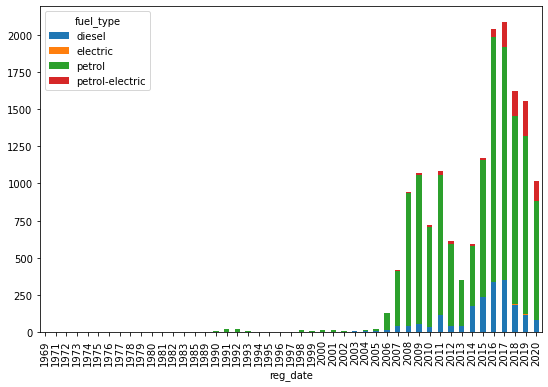

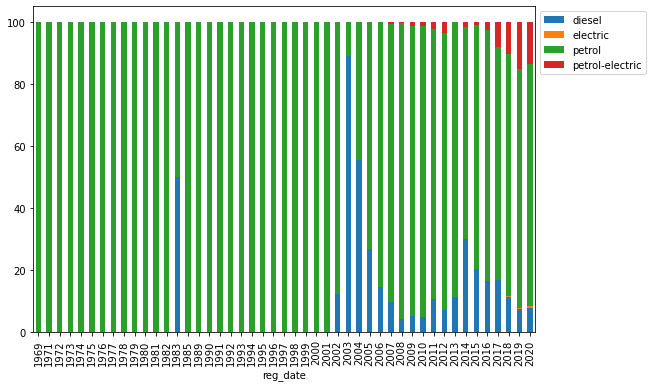

In [ ]:
# distribution plots of fuel_type over years
# data1 = data1[~(data1.reg_date > "2021")]
grouped_data1 = data1.groupby([data1.reg_date.dt.year, "fuel_type"]).size()

# Plot absolute numbers of fuel type
ax_type1 = grouped_data1.unstack().plot(
    kind="bar", stacked=True, figsize=(9,6)
)

# Plot percentage of fuel type
ax_type2 = grouped_data1.groupby(level=0).apply(
    lambda x: 100 * x / x.sum()
).unstack().plot(
    kind='bar', stacked=True, figsize=(9,6)
).legend(bbox_to_anchor=(1, 1))

In [ ]:
## Replace NAN with 'missing'
data1.fuel_type[data1.fuel_type.isna()] = "missing"

In [ ]:
# distribution plots of fuel_type over years
# data1 = data1[~(data1.reg_date > "2021")]
grouped_data1 = data1.groupby([data1.reg_date.dt.year, "fuel_type"]).size()

# Plot absolute numbers of fuel type
ax_type1 = grouped_data1.unstack().plot(
    kind="bar", stacked=True, figsize=(9,6)
)

# Plot percentage of fuel type
ax_type2 = grouped_data1.groupby(level=0).apply(
    lambda x: 100 * x / x.sum()
).unstack().plot(
    kind='bar', stacked=True, figsize=(9,6)
).legend(bbox_to_anchor=(1, 1))

## make analysis

In [ ]:
# Input make
# Plot make vs reg_date

In [ ]:
# make new column "complete_make" that takes first word from title 
data1['complete'] = [title.split(" ")[0].lower() for title in data1.title]

In [ ]:
# Rename mercedes to mercedes-benz
# Combine makes with counts less than 10 into "others" category
MIN_COUNT = 10
data1.complete_make[data1.complete_make == "mercedes"] = "mercedes-benz"

make_counts = data1.complete_make.value_counts().sort_values()
unpopoular_makes = make_counts.index[make_counts < MIN_COUNT].to_list()
print(unpopoular_makes)
data1.complete_make[data1.complete_make.isin(unpopoular_makes)] = "others"

['joylong', 'hafei', 'chery', 'higer', 'daf', 'international', 'austin', 'iveco', 'mitsuoka', 'dongfeng', 'dodge', 'chrysler', 'yutong', 'golden', 'daimler', 'cupra', 'saab', 'tesla', 'ruf', 'man', 'alpine', 'hummer', 'mg', 'foton', 'lotus', 'ud', 'scania', 'maxus', 'perodua']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
data1.complete_make.value_counts()

toyota           2871
mercedes-benz    2146
honda            2118
bmw              1615
nissan           1077
audi              680
mitsubishi        669
volkswagen        610
hyundai           566
mazda             541
kia               498
porsche           366
lexus             312
subaru            289
mini              200
volvo             191
suzuki            189
isuzu             105
land              104
jaguar            103
maserati          100
bentley            94
renault            90
peugeot            90
citroen            90
others             78
lamborghini        59
ferrari            57
skoda              56
rolls-royce        55
ford               55
opel               51
fiat               45
ssangyong          41
chevrolet          40
hino               37
seat               30
infiniti           27
mclaren            24
proton             23
aston              22
byd                20
jeep               15
daihatsu           13
alfa               11
Name: comp

In [ ]:
# Get the top 5 makes by year
grouped_make_series = data1.groupby(['reg_date_year', 'complete_make']).title.count()
grouped_make_top = pd.DataFrame(grouped_make.groupby(level='reg_date_year').nlargest(5).reset_index(level=0, drop=True)).reset_index() 

In [ ]:
data_make = data1[data1['complete_make'].isin(grouped_make_top['complete_make'].unique())]
data_make_group = data_make.groupby(['reg_date_year', 'complete_make']).agg({'title': 'count'}).reset_index()
data_make_group.rename({"title": "count_make"}, axis = 1, inplace = True)

In [ ]:
grouped_year = pd.DataFrame(data1.groupby(['reg_date_year']).title.count())
grouped_year.rename({"title": "count_total"}, axis = 1, inplace = True)
grouped_year.reset_index(inplace=True)
data_make_group_merge = data_make_group.merge(grouped_year, how = 'left', on = "reg_date_year")
data_make_group_merge["% of total"] = data_make_group_merge["count_make"]/data_make_group_merge["count_total"]

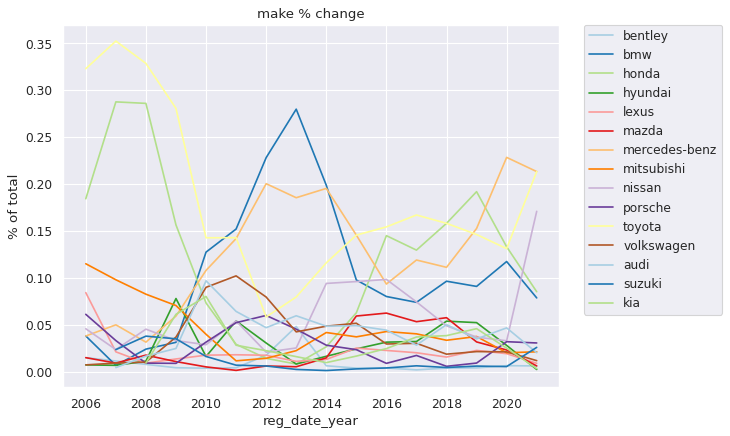

In [ ]:
# lineplots for make 
figure(figsize=(8, 6), dpi=80)
sns.lineplot(data=data_make_group_merge, x="reg_date_year", y="% of total", hue="complete_make", palette=sns.color_palette("Paired", n_colors=len(grouped_make_top['complete_make'].unique())))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("make % change")
plt.show()

In [ ]:
data_make_group_merge

,reg_date_year,complete_make,count_make,count_total,% of total
0,2006,bentley,2,130,0.015385
1,2006,bmw,5,130,0.038462
2,2006,honda,24,130,0.184615
3,2006,hyundai,1,130,0.007692
4,2006,lexus,11,130,0.084615
...,...,...,...,...,...
228,2021,nissan,182,1063,0.171214
229,2021,porsche,33,1063,0.031044
230,2021,suzuki,28,1063,0.026341
231,2021,toyota,227,1063,0.213547


- The top 5 brands contains both economical as well as luxury car choices 
- Zoom in to some specific brands: e.g. lexus becomes less popular over the years
- bmw and mercedes is on the rise, maybe coz they have new petro-electric car coming as well?


In [ ]:
# separate car makes into economy and luxury
economy_make = ['toyota', 'honda', 'mitsubishi','nissan', 'suzuki', 'hyundai', 'kia', 'mazda']
luxury_make = ['lexus', 'porsche', 'mercedes-benz','bmw', 'audi', 'volkswagen', 'bentley']

data_make_economy = data_make_group_merge[data_make_group_merge['complete_make'].isin(economy_make)]
data_make_luxury = data_make_group_merge[data_make_group_merge['complete_make'].isin(luxury_make)]

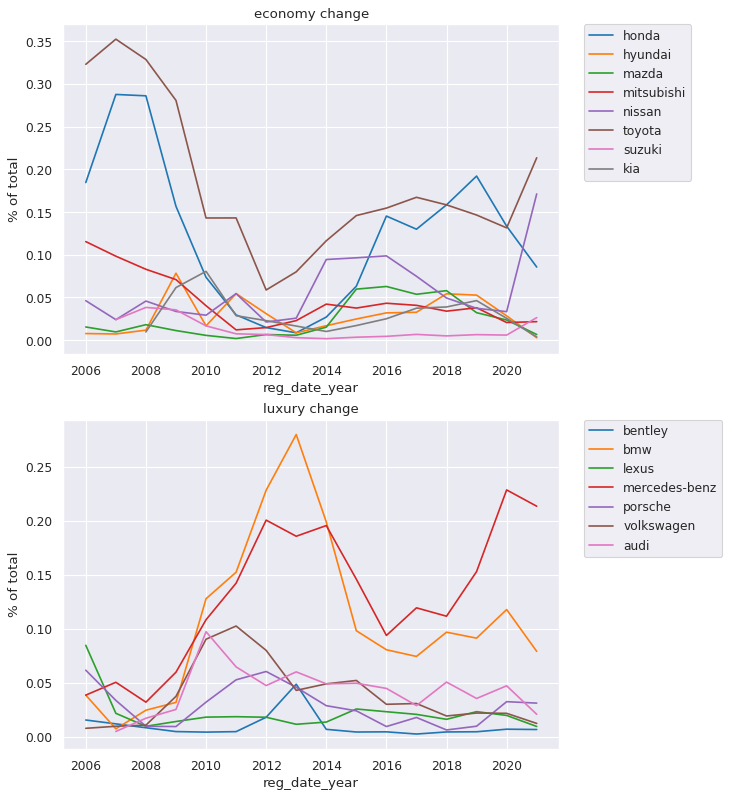

In [ ]:
#lineplots for economy and luxury makes
figure(figsize=(8, 12), dpi=80)
plt.subplot(2, 1, 1)
sns.lineplot(data=data_make_economy, x="reg_date_year", y="% of total", hue="complete_make", palette=sns.color_palette("tab10", n_colors=len(data_make_economy['complete_make'].unique())))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("economy change")

plt.subplot(2, 1, 2)
sns.lineplot(data=data_make_luxury, x="reg_date_year", y="% of total", hue="complete_make", palette=sns.color_palette("tab10", n_colors=len(data_make_luxury['complete_make'].unique())))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("luxury change")
plt.show()

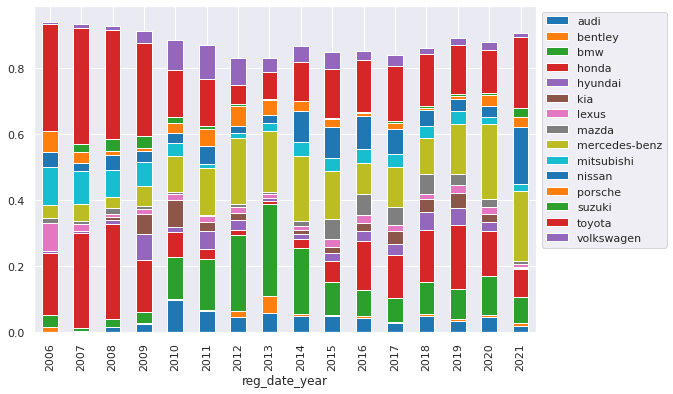

In [ ]:
# distribution barplots for makes from yearly top 5 list
import numpy as np
pd.pivot_table(data_make_group_merge, values='% of total', index=['reg_date_year'],
                    columns=['complete_make'], aggfunc=np.sum).plot(
    kind='bar', stacked=True, figsize=(9,6)
).legend(bbox_to_anchor=(1, 1))

In [ ]:
# distribution barplots for economy and luxury makes from yearly top 5 list
figure(figsize=(8, 12), dpi=80)
pd.pivot_table(data_make_economy, values='% of total', index=['reg_date_year'],
                    columns=['complete_make'], aggfunc=np.sum).plot(
    kind='bar', stacked=True, figsize=(9,6)
).legend(bbox_to_anchor=(1, 1))
plt.title("economy change")
plt.show()

pd.pivot_table(data_make_luxury, values='% of total', index=['reg_date_year'],
                    columns=['complete_make'], aggfunc=np.sum).plot(
    kind='bar', stacked=True, figsize=(9,6)
).legend(bbox_to_anchor=(1, 1))
plt.title("luxury change")
plt.show()

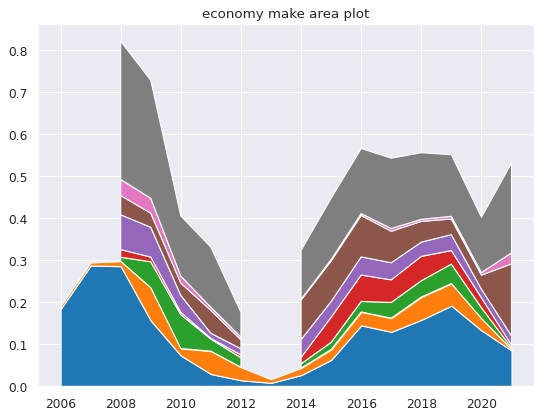

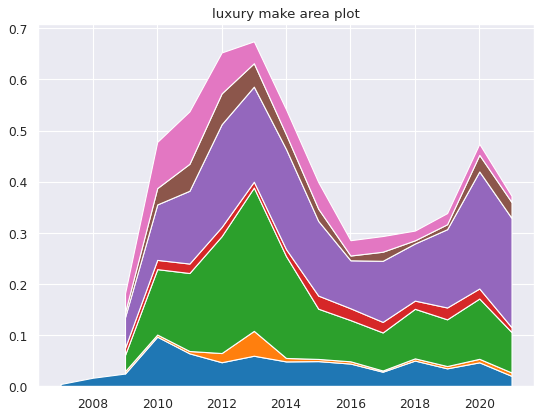

In [ ]:
# stacked bar for economy and luxury makes from yearly top 5 list
figure(figsize=(8, 6), dpi=80)
economy_pivot = pd.pivot_table(data_make_economy, values='% of total', index=['reg_date_year'],
                    columns=['complete_make'], aggfunc=np.sum)
plt.stackplot(economy_pivot.index, np.transpose(economy_pivot))
plt.title('economy make area plot')
plt.show()

figure(figsize=(8, 6), dpi=80)
luxury_pivot = pd.pivot_table(data_make_luxury, values='% of total', index=['reg_date_year'],
                    columns=['complete_make'], aggfunc=np.sum)
plt.stackplot(luxury_pivot.index, np.transpose(luxury_pivot))
plt.title('luxury make area plot')
plt.show()

In [ ]:
# to print top 5 makes grouped by year
M = 5
top_makes = {}
for idx, series in make_grouped_data1.groupby(level=0):
    top_yearly = series.sort_values(ascending=False)[0:M].index.to_frame()["complete_make"].to_list()
    top_makes[idx] = top_yearly

In [ ]:
print(top_makes)

In [ ]:
# data1.title[data1.title.map(lambda x: x.startswith("Mercedes"))]

In [ ]:
# distribution barplots by percentage
data1 = data1[(data1.reg_date > "2005") & (data1.reg_date < "2021")]
make_grouped_data1 = data1.groupby([data1.reg_date.dt.year, "complete_make"]).size()

# Plot absolute numbers of make
ax_type1 = make_grouped_data1.unstack().plot(
    kind="bar", stacked=True, figsize=(9,6)
).legend(bbox_to_anchor=(1, 1))

# Plot percentage of make
ax_type2 = make_grouped_data1.groupby(level=0).apply(
    lambda x: 100 * x / x.sum()
).unstack().plot(
    kind='bar', stacked=True, figsize=(9,6)
).legend(bbox_to_anchor=(1, 1))

## analysis of engine_cap vs reg_date

In [ ]:
sns.scatterplot(data=data1, x="reg_date", y="engine_cap")

In [ ]:
# boxplots of yearly engine_cap
fig, ax = plt.subplots(figsize=(20, 16))
sns.boxplot(x=data1.reg_date.dt.year, y=data1.engine_cap)
sns.stripplot(x=data1.reg_date.dt.year, y=data1.engine_cap, linewidth=1.4)

In [ ]:
# minimum, maximum, mean and standard deviation for engine_cap over the years
data1.groupby(data1.reg_date.dt.year).agg(min_engine_cap=('engine_cap',np.min),max_engine_cap=('engine_cap',np.mean),mean_engine_cap=('engine_cap',np.mean), std_engine_cap=('engine_cap',np.std))

## analysis of curb_weight vs reg_date

In [ ]:
sns.scatterplot(data=data1, x="reg_date", y="curb_weight")

In [ ]:
# boxplots of yearly curb_weight
fig, ax = plt.subplots(figsize=(20, 16))
sns.boxplot(x=data1.reg_date.dt.year, y=data1.curb_weight)
sns.stripplot(x=data1.reg_date.dt.year, y=data1.curb_weight, linewidth=1.4)

In [ ]:
# minimum, maximum, mean and standard deviation for curb_weight over the years
data1.groupby(data1.reg_date.dt.year).agg(min_curb_weight=('curb_weight',np.min),max_curb_weight=('curb_weight',np.max),mean_curb_weight=('curb_weight',np.mean), std_curb_weight=('curb_weight',np.std))

## analysis of power vs reg_date

In [ ]:
sns.scatterplot(data=data1, x="reg_date", y="power")

In [ ]:
# boxplots of yearly power
fig, ax = plt.subplots(figsize=(20, 16))
sns.boxplot(x=data1.reg_date.dt.year, y=data1.power)
sns.stripplot(x=data1.reg_date.dt.year, y=data1.power, linewidth=1.4)

In [ ]:
# minimum, maximum, mean and standard deviation for power over the years
data1.groupby(data1.reg_date.dt.year).agg(min_power=('power',np.min),max_power=('power',np.max),mean_power=('power',np.mean), std_power=('power',np.std))